In this project we will create a convolutional Neural Network which will able to predict species of bird. We will use different layers and other hyperparameter for building, training and testing this multiclass classification model.We will be using keras in this project

In [1]:
# Load the drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive"

!ls "/content/drive/My Drive"

'10th marksheet1.pdf'	       'Ashish resume.pdf'
'10th Mark sheet (1).pdf'      'Bird Speciees Dataset'
'10 th marksheet2.pdf'	       'Colab Notebooks'
'10th Mark sheet.pdf'	       'Contacts List.gsheet'
'12th marksheet.pdf'	       'Degree marksheet.pdf'
 1422031009.pdf		       'edited_Resume_Ashish kumar mandal_Format1.pdf'
 20180408_111218.jpg	       'Innomatics_Internship(Project).zip'
 20190712162424.pdf	       'Pan Card12.pdf'
'Aadhar card1.pdf'	       'Passport size photo1.pdf'
'Adhar card.pdf'	       'Resume_Ashish kumar mandal_Format1.pdf'
'April  2019 salary slip.pdf'  'Resume Checklist.docx'
'Ashish Data_Scientist-1.pdf'  'resume format.docx'
'Ashish Data_Scientist-2.pdf'  'Screenshot (131).png'
'Ashish Mandal.doc'	       'Tenants drain line  parameters 1.gsheet'


In [6]:
# Import Librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split

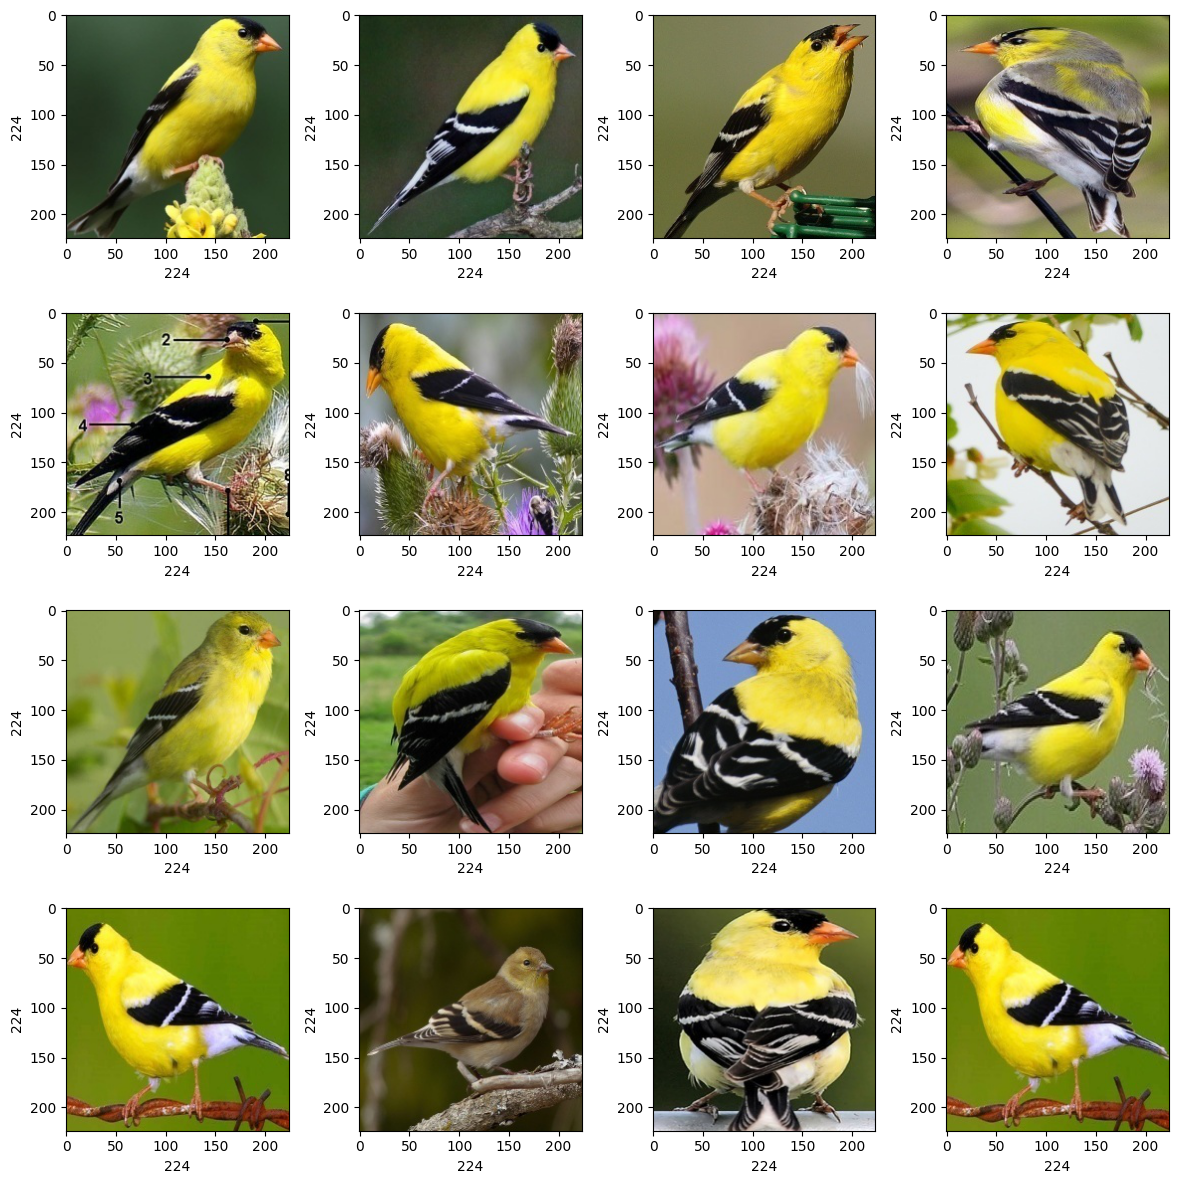

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + "/" + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [8]:
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [9]:
# Reading and Converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [10]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts


AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [11]:
num_classes = len(label_counts)
num_classes

6

In [14]:
image_list[0].shape

(224, 224, 3)

In [16]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state=10)


In [19]:
x_train = np.array(x_train, dtype = np.float16)/225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)

In [21]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

[0 1 2 3 4 5]


In [22]:
# Splitting the training data set into trainning and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2)

In [23]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding="same",input_shape = (224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(16, (3,3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [27]:
model.compile(loss = "categorical_crossentropy", optimizer = Adam(0.0005),metrics = ["accuracy"])

In [28]:
# Traing the Model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 12s 234ms/step - loss: 1.7916 - accuracy: 0.1795 - val_loss: 1.7912 - val_accuracy: 0.1692
Epoch 2/50
5/5 [==============================] - 0s 100ms/step - loss: 1.7899 - accuracy: 0.1892 - val_loss: 1.7917 - val_accuracy: 0.2385
Epoch 3/50
5/5 [==============================] - 0s 78ms/step - loss: 1.7866 - accuracy: 0.2336 - val_loss: 1.7935 - val_accuracy: 0.1615
Epoch 4/50
5/5 [==============================] - 0s 94ms/step - loss: 1.7827 - accuracy: 0.1892 - val_loss: 1.7999 - val_accuracy: 0.1923
Epoch 5/50
5/5 [==============================] - 0s 80ms/step - loss: 1.7784 - accuracy: 0.2452 - val_loss: 1.7921 - val_accuracy: 0.1692
Epoch 6/50
5/5 [==============================] - 0s 81ms/step - loss: 1.7751 - accuracy: 0.1853 - val_loss: 1.7849 - val_accuracy: 0.1692
Epoch 7/50
5/5 [==============================] - 0s 98ms/step - loss: 1.7697 - accuracy: 0.2046 - val_loss: 1.7804 - val_accuracy: 0.2231
Epoch 8/50
5/5 [========

In [29]:
model.save("/content/drive/My Drive/bird_species.h5")

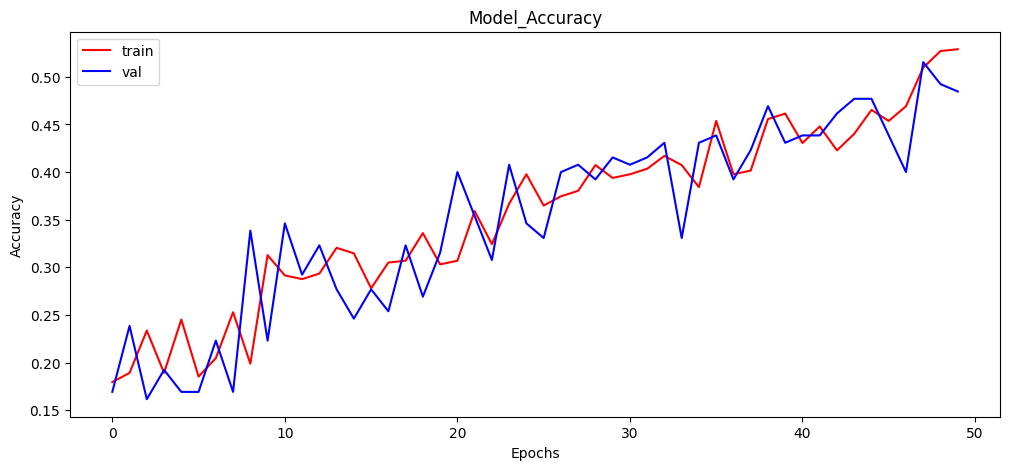

In [30]:
# plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history["accuracy"],color = "r")
plt.plot(history.history["val_accuracy"],color = "b")
plt.title("Model_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.show()

<ipython-input-31-91088aa420d8>:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("train","val")


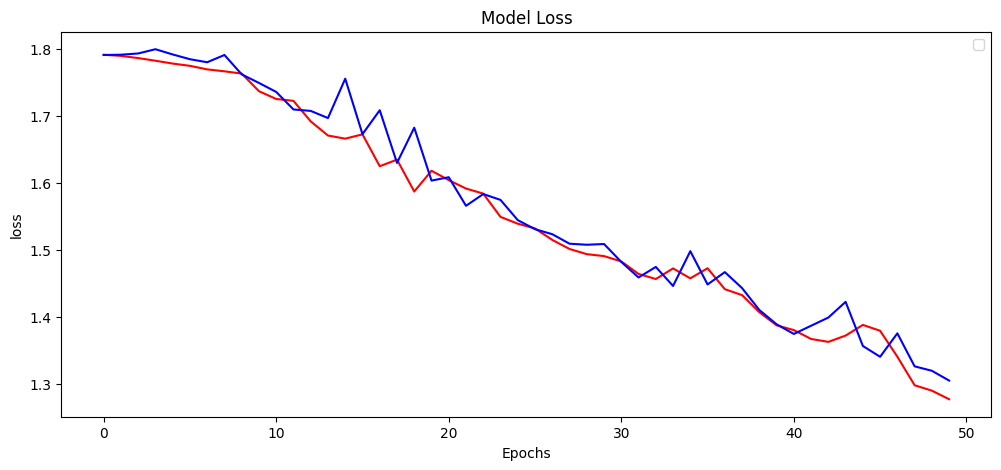

In [31]:
# Plot the loss history
plt.figure(figsize=(12,5))
plt.plot(history.history["loss"],color = "r")
plt.plot(history.history["val_loss"],color = "b")
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend("train","val")
plt.show()

In [32]:
  # Calculating test accuracy
  scores = model.evaluate(x_test,y_test)
  print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 0s 28ms/step - loss: 1.4808 - accuracy: 0.4172
Test Accuracy: 41.71779155731201


In [33]:
# Storing the Predictions
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 14ms/step


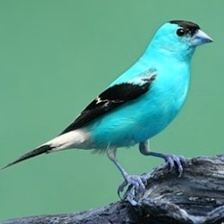

In [35]:
# plotting image to compare
img = array_to_img(x_test[5])
img

In [36]:
# Finding max value from prediction list and comaparing original value vs predicated
labels = lb.classes_
print(labels)
print("Originally: ", labels[np.argmax(y_test[5])])
print("Predicted: ", labels[np.argmax(y_pred[5])])

[0 1 2 3 4 5]
Originally:  0
Predicted:  0
